In [1]:
import sympy as sp
from sympy.abc import t

In [2]:
f = sp.Function('f')(t)
A, B = sp.symbols('A B')
equ0 = sp.Eq(sp.Derivative(f, t, 2), A * f + B * sp.Derivative(f, t, 1))
display(equ0)
result0 = sp.dsolve(equ0, f)
display(result0)

M, N = sp.symbols('M N')
f1 = result0.rhs.args[0].args[1].args[0].coeff(t) # type:ignore
f2 = result0.rhs.args[1].args[1].args[0].coeff(t) # type:ignore
equ1 = sp.Eq(f1, M)
equ2 = sp.Eq(f2, N)
display(equ1)
display(equ2)

solution=sp.solve((equ1, equ2), (A, B))
equ3 = sp.Eq(A, solution[0][0])
equ4 = sp.Eq(B, solution[0][1])
display(equ3)
display(equ4)

equ5 = sp.Eq(sp.Derivative(f, t, 2), (solution[0][0]) * f + (solution[0][1]) * sp.Derivative(f, t, 1))
display(equ5)
result5 = sp.dsolve(equ5, f)
display(result5)

Eq(Derivative(f(t), (t, 2)), A*f(t) + B*Derivative(f(t), t))

Eq(f(t), C1*exp(t*(B - sqrt(4*A + B**2))/2) + C2*exp(t*(B + sqrt(4*A + B**2))/2))

Eq(B/2 - sqrt(4*A + B**2)/2, M)

Eq(B/2 + sqrt(4*A + B**2)/2, N)

Eq(A, -M*N)

Eq(B, M + N)

Eq(Derivative(f(t), (t, 2)), -M*N*f(t) + (M + N)*Derivative(f(t), t))

Eq(f(t), C1*exp(M*t) + C2*exp(N*t))

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
def nexty(cury, A, dt=0.001, deep=5):
    assert len(A.shape) == 2 and A.shape[0] == A.shape[1]
    K = np.eye(A.shape[0])
    k = 1
    for p in range(1, deep):
        k *= p
        K += A**p * dt**p / k
    return K @ cury

def getTrajectory(starty, A, dt=0.01, deep=5):
    cury = starty
    trajectory = [cury]
    for s in range(10000):
        cury = nexty(cury, A, 0.001, 10)
        trajectory.append(cury)
    trajectory = np.array(trajectory).squeeze()
    return trajectory

def plotA(A):
    fig = plt.figure(figsize=(8, 6))
    gs1 = gridspec.GridSpec(3, 4)
    ax1 = plt.subplot(gs1[0, 0])
    ax2 = plt.subplot(gs1[1, 0])
    ax3 = plt.subplot(gs1[2, 0])
    ax4 = plt.subplot(gs1[:, 1:])

    eigval, eigvec = np.linalg.eig(A)

    starty = np.array([[3.0], [3.0]])
    trajectory = getTrajectory(starty, A)
    ax1.plot(trajectory[:, 0], trajectory[:, 1])
    ax1.grid()

    starty = 3 * eigvec[:, 0]
    trajectory2 = getTrajectory(starty, A)
    ax2.plot(trajectory2[:, 0], trajectory2[:, 1])
    ax2.grid()

    starty = 3 * eigvec[:, 1]
    trajectory3 = getTrajectory(starty, A)
    ax3.plot(trajectory3[:, 0], trajectory3[:, 1])
    ax3.grid()

    x = np.linspace(-4, 4, 10)
    y = np.linspace(-4, 4, 10)
    X, Y = np.meshgrid(x, y)
    dX = A[0][0] * X + A[0][1] * Y
    dY = A[1][0] * X + A[1][1] * Y
    ax4.streamplot(X, Y, dX, dY)
    ax4.set(xlim=(-4.1, 4.1), ylim=(-4.1, 4.1))
    ax4.plot(trajectory[:, 0], trajectory[:, 1])
    ax4.plot(trajectory2[:, 0], trajectory2[:, 1])
    ax4.plot(trajectory3[:, 0], trajectory3[:, 1])
    ax4.grid()

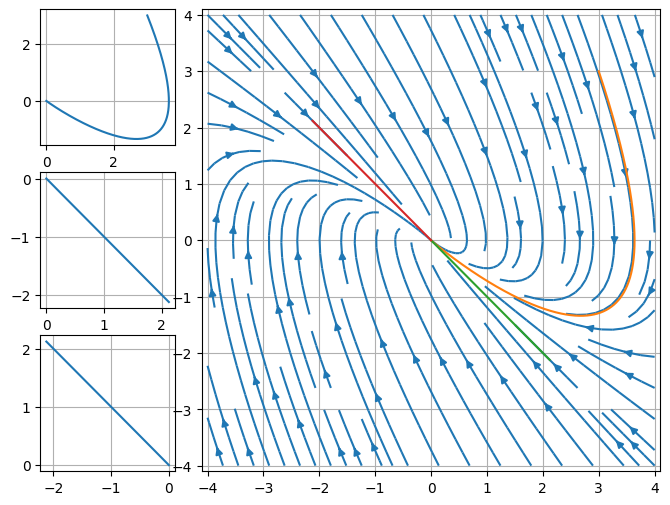

In [4]:
A = np.array([[0.0, 1.0], [-1.0, -2.0]])
plotA(A)

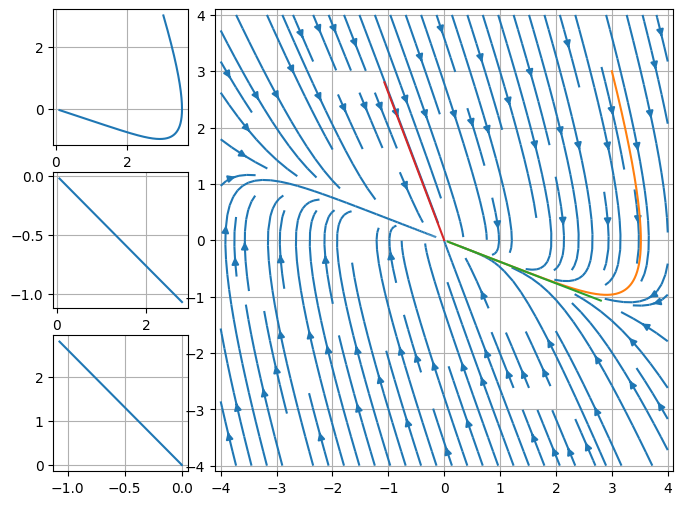

In [5]:
A = np.array([[0.0, 1.0], [-1.0, -3.0]])
plotA(A)